# UFCFVQ-15-M Programming for Data Science (Spring 2024 Resit)

## Student Id: 

# Resit Programming Task 2

### Requirement FR6 - Read CSV data from two files and merge it into a single Data Frame 

In [1]:
import pandas as pd

# Read the first CSV file
df1 = pd.read_csv('resit_task2a.csv')

# Read the second CSV file
df2 = pd.read_csv('resit_task2b.csv')

# merge it into a single dataset 
merged_df = pd.concat([df1, df2], ignore_index=True)

# print new DataFrame
print(merged_df)

            Entity  Year  Schizophrenia (%)  Bipolar disorder (%)  \
0      Afghanistan  1990           0.160560              0.697779   
1      Afghanistan  1991           0.160312              0.697961   
2      Afghanistan  1992           0.160135              0.698107   
3      Afghanistan  1993           0.160037              0.698257   
4      Afghanistan  1994           0.160022              0.698469   
...            ...   ...                ...                   ...   
12931     Zimbabwe  2013                NaN                   NaN   
12932     Zimbabwe  2014                NaN                   NaN   
12933     Zimbabwe  2015                NaN                   NaN   
12934     Zimbabwe  2016                NaN                   NaN   
12935     Zimbabwe  2017                NaN                   NaN   

       Eating disorders (%)  Anxiety disorders (%)  Depression (%)  \
0                  0.101855               4.828830        4.071831   
1                  0.099313    

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR7 - Explore the dataset to identify an "interesting" pattern or trend

Coefficients: [0.76950396]
Intercept: 0.5562846443289988
Pearson Correlation Coefficient: 0.19845550996372432
P-value: 1.9055184918197987e-58


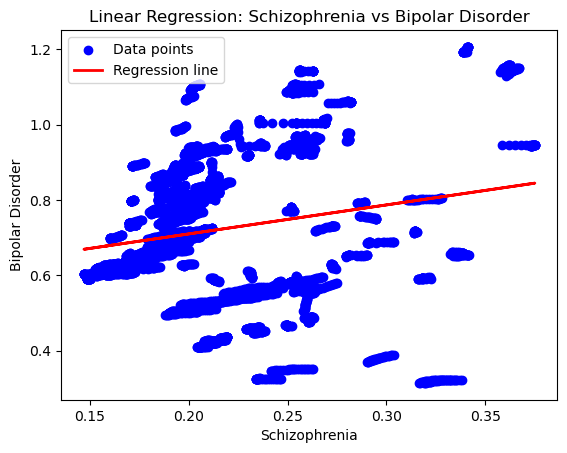

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# read dataset
data = pd.read_csv('resit_task2a.csv')

# pick the column 'Schizophrenia' and 'Bipolar_disorder'
X = data[['Schizophrenia (%)']].values
y = data['Bipolar disorder (%)'].values

# build linearregression model
model = LinearRegression()

# fitting model 
model.fit(X, y)

# make predeictions 
predictions = model.predict(X)

# print coeffixients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# caculate pearson correlation coefficient 
corr_coef, p_value = pearsonr(X.flatten(), y)

print('Pearson Correlation Coefficient:', corr_coef)
print('P-value:', p_value)

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions, color='red', linewidth=2, label='Regression line')

# show the model
plt.legend()
plt.title('Linear Regression: Schizophrenia vs Bipolar Disorder')
plt.xlabel('Schizophrenia')
plt.ylabel('Bipolar Disorder')

plt.show()

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR8 - Detect and remove any outliers in the data used for your "interesting" pattern or trend

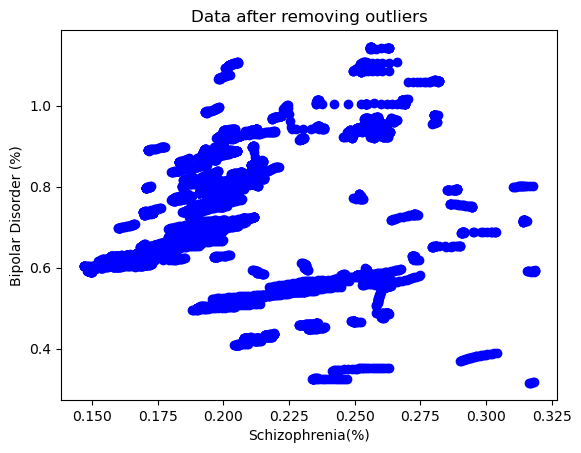

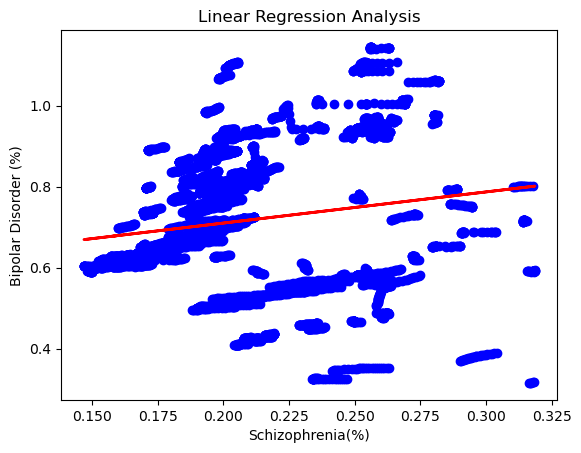

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('resit_task2a.csv')

# caculateIQR
Q1 = data['Schizophrenia (%)'].quantile(0.25)
Q3 = data['Schizophrenia (%)'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = data[(data['Schizophrenia (%)'] >= lower_bound) & (data['Schizophrenia (%)'] <= upper_bound)]

# Visualize the cleaned data
plt.scatter(filtered_data['Schizophrenia (%)'], filtered_data['Bipolar disorder (%)'], color='blue')
plt.title('Data after removing outliers')
plt.xlabel('Schizophrenia(%)')
plt.ylabel('Bipolar Disorder (%)')
plt.show()

#as same sa up there
X = filtered_data[['Schizophrenia (%)']].values
y = filtered_data['Bipolar disorder (%)'].values
y_pred = model.predict(X)
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Linear Regression Analysis')
plt.xlabel('Schizophrenia(%)')
plt.ylabel('Bipolar Disorder (%)')
plt.show()

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR9 - Define a hypothesis to test your “interesting” pattern or trend

In [17]:
import numpy as np
from scipy import stats

y_pred = model.predict(X)  # Model predicted value
residuals = y - y_pred  # Residual = observed value - predicted value

# assume that slope is the intercept of linearregression model
slope = model.coef_[0]
# Suppose std_err is the standard error of the slope
std_err = np.std(residuals) * np.sqrt((X.shape[0] - 2) / ((X * X).sum()))

# Calculate the t statistic
t_stat = slope / std_err

# Calculate p values by using SciPy
p_value = 2 * (1 - stats.norm.cdf(abs(t_stat)))  #Two-tailed test

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Decide whether to reject the null hypothesis based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis. No significant relationship found.")

T-statistic: 1.009698755402476
P-value: 0.3126396389468411
Fail to reject the null hypothesis. No significant relationship found.


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR10 - Test your hypothesis with statistical significance level of 0.05

In [19]:
import statsmodels.api as sm

# define x and y 
X = filtered_data[['Schizophrenia (%)']].values
y = filtered_data['Bipolar disorder (%)'].values

# Add a constant term so that the intercept is included in the model
X = sm.add_constant(X)

# Create a model and fit it
model_sm = sm.OLS(y, X).fit()

# View model summaries, including T-test results
print(model_sm.summary())

# p-value and t-value
params = model_sm.params
p_values = model_sm.pvalues
t_values = model_sm.tvalues

# Significance level
alpha = 0.05

# Test hypothesis
for i, (param, p_value, t_value) in enumerate(zip(params, p_values, t_values)):
    print(f"Coefficient: {param}, T-value: {t_value}, P-value: {p_value}")
    if p_value < alpha:
        print(f"Reject the null hypothesis for coefficient {param}.")
    else:
        print(f"Fail to reject the null hypothesis for coefficient {param}.")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     171.3
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           1.23e-38
Time:                        13:10:50   Log-Likelihood:                 2581.9
No. Observations:                6229   AIC:                            -5160.
Df Residuals:                    6227   BIC:                            -5146.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5653      0.012     48.386      0.0

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Coding Standards
<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>